## Daten aufbereiten
Eine wichtige und nicht ganz einfache Aufgabe ist es, die Daten, die verwendet werden aufzubereiten.
Daten können aus unterschiedlichen Quellen mit unterschiedlicher Qualität und mit unterschiedlichen Unsicherheiten kommen.
Daher müssen die Daten geprüft und bei Bedarf angepasst werden.
Hilfreich ist dabei sich die Daten anzusehen - tabellarisch, grafisch oder mit Kennzahlen.

Ein hilfreiches Werkzeug hierfür ist, neben NumPy und Matplotlib, insbesondere Pandas.
Hier wird die Arbeit mit Pandas nur angedeutet. 
Ziel ist es aktuelle Forschungsdaten zu habitablen Planeten aufzubereiten, so dass sie in folgenden Abschnitten verwendet werden können.
Die Daten werden als eine CSV-Datei eingelesen und später die Daten, die weiter verarbeitet werden,
wieder als eine CSV-Datei ausgegeben, die von NumPy direkt eingelesen werden kann. Somit sind dann nur noch numerische Werte enthalten. 

Import wichtiger Pakete, die verwendet werden.

In [1]:
# --- imports
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.patches as mpatches

### 1. Daten für habitable Planeten

Nachdem für eine kleine Menge von Planeten die Untersuchung auf habitable Planeten durchgeführt wurde,
wird nun die komplette Menge der derzeit verfügbaren Daten herangezogen. Auf der Webseite https://phl.upr.edu/hwc
des Planet Habitability Laboratory, an der University of Puerto Rico in Arecibo, 
sind Daten der aktuellen entdeckten (Exo-)planeten vorhanden. Die Daten wurden am 22.08.2024 exportiert.

Die Daten werden in ein `pandas`-Datenframe gespeichert.
Dort können auch nicht-numerische Daten eingetragen sein.

In [2]:
# --- read the data - complete
filename_inp = 'HabitablePlanets_complete.csv'
df_hpc = pd.read_csv (filename_inp, sep=',')

In der Tabelle sind viele Spalten enthalten, insgesamt 118. 

In [3]:
df_hpc.columns

Index(['P_NAME', 'P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_YEAR', 'P_UPDATE',
       'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_MASS_LIMIT',
       'P_MASS_ORIGIN',
       ...
       'S_ABIO_ZONE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_HABZONE_CON',
       'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI', 'S_CONSTELLATION',
       'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object', length=118)

Nachfolgende die ersten Zeilen der Tabelle, jedenfalls ein Ausschnitt davon.

In [4]:
df_hpc.head ()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,-120.0,413.0,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,-3.6,4.4,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre


### 2. Spalten auswählen und aufbereiten
Neben numerischen Werten gibt es auch Texte, also nicht-numerische Werte, oder Datenzellen, in die kein Wert eingetragen ist (`NaN` = Not a Number).

Für die weiteren Untersuchungen werden nur die Spalten
- `S_MASS` (Masse des Elternsterns in Sonnenmassen), 
- `P_PERIOD` (Umlaufzeit des Planeten in Tagen),
- `P_DISTANCE` (Entfernung des Planeten zum Elternstern in Astronomischen Einheiten (AU)) und
- `P_HABITABLE` (Kennzeichen, ob habitable (1 optimistische Einschätzung, 2 konservative Einschätzung)) oder nicht habitable (0).

selektiert.
Diese Spalten wurden bereits für das einfache Einführungsbeispiel bei den Algorithmen DT (Entscheidungsbaum, *Decision Tree*) 
und kNN (k-Nächste Nachbarn, *k-Nearest Neighbours*) verwendet.

Nach der Auswahl der für die Untersuchung benötigten Spalten werden diejenigen Zeilen gelöscht, in denen Daten fehlen.
Es werden also diejenigen Zeilen gelöscht, in denen in den vier wichtigen Spalten Daten fehlen, 
also ein `NaN` eingetragen ist. 

Es gibt auch andere Möglichkeiten mit fehlenden Daten umzugehen.
Beispielsweise können fehlende Daten ergänzt werden, etwa durch den Mittelwert der anderen Daten. 
Dieses Verfahren wird *imputing* genannt, jedoch hier nicht betrachtet.

In [5]:
# --- select the columns for the analysis
df_selected_columns \
    = df_hpc [['S_MASS', 'P_PERIOD', 'P_DISTANCE', 'P_HABITABLE']]
print (f"number of exoplanets in the raw list : " \
       + f"{df_selected_columns.shape [0]}  (still with NaN-values)")

# --- remove the rows with NaN-values
df_removed_rows = df_selected_columns.dropna (axis = 0)
print (f"number of exoplanets in the     list : " \
       + f"{df_removed_rows.shape [0]}  (without any NaN-values)")

number of exoplanets in the raw list : 5599  (still with NaN-values)
number of exoplanets in the     list : 5350  (without any NaN-values)


Nun wird untersucht, wie viele habitablen Planeten in der Liste überhaupt sind.

In [6]:
print (df_removed_rows.groupby ('P_HABITABLE').count())

             S_MASS  P_PERIOD  P_DISTANCE
P_HABITABLE                              
0              5280      5280        5280
1                29        29          29
2                41        41          41


Für die Kennzeichenung von habitablen Planeten werden drei verschiedene Kennzeichen verwendet werden
- 0 für nicht habitabel
- 1 für habitabel nach einer optimistischen Einschätzung und
- 2 für habitabel nach einer konservativen Einschätzung.

Es wird in der Spalte `P_HABITABLE` jede 2 durch eine 1 ersetzt. Eine genauere Differenzierung ist für die weitere Untersuchung
nicht notwenig. Die Anzahl der habitablen Planenten ist klein genug!

In [7]:
# --- replace value 2 to 1 in column P_HABITABLE
df_removed_rows.loc [df_removed_rows.P_HABITABLE == 2, 'P_HABITABLE'] = 1
df_hp = df_removed_rows
print (df_hp.groupby ('P_HABITABLE').count())

             S_MASS  P_PERIOD  P_DISTANCE
P_HABITABLE                              
0              5280      5280        5280
1                70        70          70


Damit ergibt sich ein binäres Klassifikationsproblem:
- Anhand der Eigenschaften `S_MASS`, `P_PERIOD` und `P_DISTANCE` wird vorhergesagt,
  ob ein Planet habitable ist oder nicht.

### 3. Daten betrachten
Es werden nun einige statistische Kennzahlen der beschreibende Statistik ausgegeben.

In [8]:
df_hp.describe ()

,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
count,5350.000000,5.350000e+03,5350.000000,5350.000000
mean,0.967725,7.994082e+04,2.298436,0.013084
std,0.394993,5.498596e+06,103.218178,0.113646
min,0.010000,9.070629e-02,0.004408,0.000000
25%,0.810000,4.465382e+00,0.051900,0.000000
50%,0.950000,1.156951e+01,0.096550,0.000000
75%,1.100000,4.150555e+01,0.232000,0.000000
max,10.940000,4.020000e+08,7506.000000,1.000000


Es ist zu erkennen, dass es bei den Daten Ausreißer gibt. Es gibt extreme Werte (`max`), die weit vom Mittelwert (`mean`) oder dem Median (`50%`) entfernt sind.
- Bei der Eigenschaft `S_MASS` ist es nicht so extrem, da der Mittelwert und der Median nicht so weit auseinander sind. 
  Auch die Standardabweichung ist von der Größenordnung nicht so extrem.
- Bei den Eigenschaften `P_PERIOD` und `P_DISTANCE` verzerren Ausreißer die Werte für Mittelwert und Standardabweichung sehr.
  Dies muss berücksichtigt werden, wenn das ML-Modell empfindlich auf Ausreißer reagiert (Beispiel: `kNN`)

### 4. Einschub: Ausreißer mit Hilfe eines Histogramms betrachten
Dass es Ausreißer gibt kann auch mit Hilfe eines Histogramms dargestellt werden. Dies wird am Beispiel `S_MASS` gezeigt.

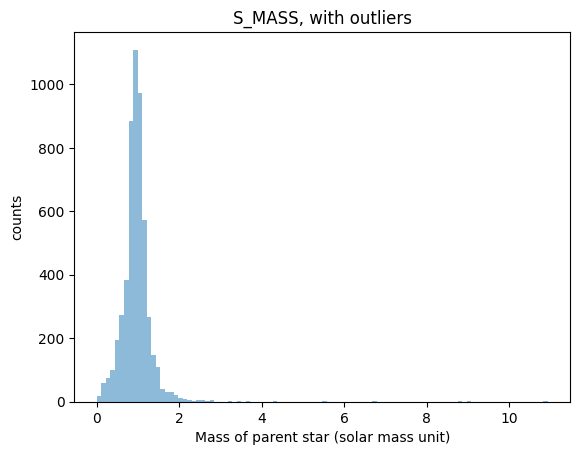

In [9]:
# --- plot histogramm for S_MASS
data_S_MASS = df_hp ['S_MASS'] 
plt.hist (data_S_MASS, bins = 100, alpha = 0.5)
plt.title ("S_MASS, with outliers")
plt.xlabel ("Mass of parent star (solar mass unit)")
plt.ylabel ("counts")
plt.show ()

Eine Möglichkeit Ausreißer zu klassifizieren ist die Festlegung, dass ein Ausreißer einen 
Abstand vom Mittelwert (`mean`) von mehr als das fünffache der Standardabweichung (`std`) hat.

In [10]:
# --- calculate z-value of the values 
# (distance of the value from the mean in units of std)
data_S_MASS_new = data_S_MASS [(np.abs (stats.zscore (data_S_MASS)) < 5)] 
print ("number of values in S_MASS with    outliners: ", data_S_MASS.size)
print ("number of values in S_MASS without outliners: ", data_S_MASS_new.size)

number of values in S_MASS with    outliners:  5350
number of values in S_MASS without outliners:  5340


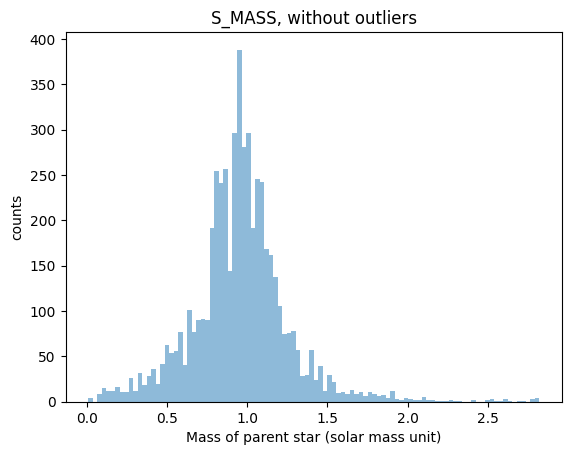

In [11]:
# --- plot histogram of S_MASS, without outliers
plt.hist(data_S_MASS_new, bins = 100, alpha = 0.5)
plt.title ("S_MASS, without outliers")
plt.xlabel ("Mass of parent star (solar mass unit)")
plt.ylabel ("counts")
plt.show ()

Für die beiden anderen Input-Daten sieht die Verbesserung des Histogramms leider nicht so gut aus. 
Da sind die Standardabweichungen durch extreme Ausreißer sehr hoch!

**Aufgabe**: Für die beiden anderen Merkmale (`P_PERIOD` und `P_DISTANCE`) ebenso jeweils ein Histogramm plotten,
sowohl mit den Ausreißern, als auch ohne Ausreißer. Wie können hier die Ausreißer sinnvollerweise definiert werden?
Kann dazu der Median und der Interquartilsabstand hilfreich sein?

### 3. Daten betrachten (Fortsetzung)
Die Daten wurden auf verschiedene Weise tabellarisch betrachtet. Nun wird eine grafische Darstellung erstellt.
Dafür werden nur zwei Eigenschaften ausgewählt. Es sind dieselben, die auch im Einführungsbeispiel 
verwendet wurden: `S_MASS`und `P_PERIOD`. Der Code wurde von [Acq2023] entnommen und leicht angepasst.
Wegen Ausreißern wurde der Bereich der Daten, welcher geplottet wird, begrenzt. 

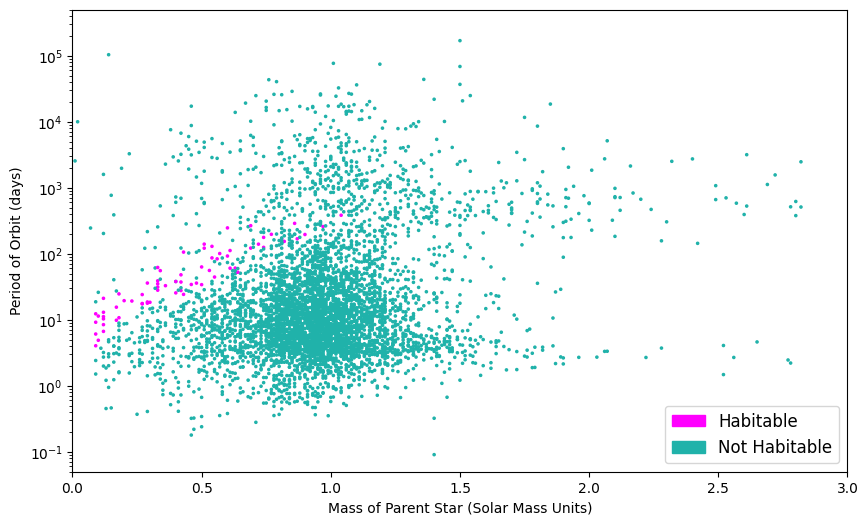

In [12]:
# --- plot the planets 
plt.figure(figsize=(10,6))

C_NOT = '#20B2AA' # color not habitable
C_HAB = '#FF00FF' # color habitable
cmap = matplotlib.colors.LinearSegmentedColormap.from_list \
    ("cmap", [C_NOT, C_HAB])

a = plt.scatter(df_hp ['S_MASS'], df_hp ['P_PERIOD'], marker = '.',\
            c = df_hp ['P_HABITABLE'], s = 10, cmap=cmap, label = 'Test')
plt.legend()

plt.yscale('log')
plt.xlabel('Mass of Parent Star (Solar Mass Units)')
plt.ylabel('Period of Orbit (days)');

plt.xlim ([0.0, 3.0])
plt.ylim ([5*1e-2, 5*1e5])
bluepatch = mpatches.Patch (color=C_NOT, label='Not Habitable')
magentapatch = mpatches.Patch (color=C_HAB, label='Habitable')

ax = plt.gca()
leg = ax.get_legend()

plt.legend(handles=[magentapatch, bluepatch],\
           loc = 'lower right', fontsize = 12)
plt.show ()

Der Grafik macht deutlich, dass die habitablen Planeten sehr dünn gesäht sind. Betrachtet man unser Sonnensystem, dann ist das nicht verwunderlich!

### 5. Daten als NumPy-Array in eine CSV-Datei schreiben
Die Daten sind nun aufbereitet und betrachtet.
Sie werden nun als NumPy-Array in eine CSV-Datei geschrieben. 
Dies erfolgt jedoch mit `pandas`, welches das Datenframe als CSV-Datei speichert.
Damit kann die CSV-Datei in nachfolgenden Einheiten direkt von NumPy eingelesen werden,
ohne dass noch eine große Aufbereitung durchgeführt werden muss.
Eventuell sind Ausreißer zu beachten und speziell zu behandeln!


In [13]:
# --- write data to csv-file
filename_out = 'HabitablePlanets_work.csv'
pd.DataFrame (df_hp).to_csv (filename_out)

### 6. Abschließende Bemerkungen ###
Die Aufbereitung von Daten wurde hier nur kurz angerissen.
Die Aufgabe der Aufbereitung der Daten ist keine einfache Aufgabe. 
Sie wird hier jedoch nicht genauer vertief. 
Es gibt technische Herausforderungen (dabei kann `pandas` helfen, siehe dazu beispielsweise [Van2024]),
jedoch auch fachlichen Herausforderungen. 
Für die fachlichen Herausforderungen ist es wichtig, die Daten zu verstehen.
Daher benötigt man dazu einen tiefen fachlichen Hintergrund.

### Literatur ###
- [Acq2023] Viviana Acquaviva; Machine Learning for Physics and Astronomy; Princeton University Press; 2023
- [Van2024] Jake VanderPlas; Handbuch Data Science mit Python; O'Reilly; 2024; (Übersetzung der 2. Auflage von *Python Data Science Handbook*)
